任务：
1采用Kmeans算法实现2D数据自动聚类，预测V1=80，V2=60
2计算预测准确率，完成结果矫正
采用KNN Meanshift 重复1-2

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('Cluster/data.csv')

In [2]:
data.head()

,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


In [6]:
X=data.drop('labels',axis=1)
y=data.loc[:,'labels']

In [7]:
pd.value_counts(y)

2    1156
1     954
0     890
Name: labels, dtype: int64

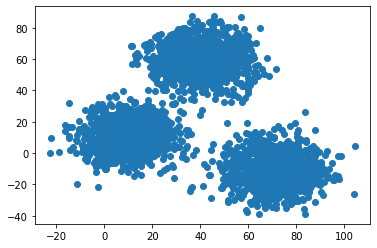

In [10]:
import matplotlib.pyplot as plt
fig1=plt.figure()
plt.scatter(X.loc[:,'V1'],X.loc[:,'V2'])

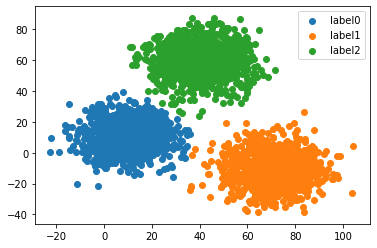

In [14]:
label0=plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1=plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2=plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])
plt.legend((label0,label1,label2),('label0','label1','label2'))

In [17]:
from sklearn.cluster import KMeans
KM=KMeans(n_clusters=3,random_state=0)
KM.fit(X,y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

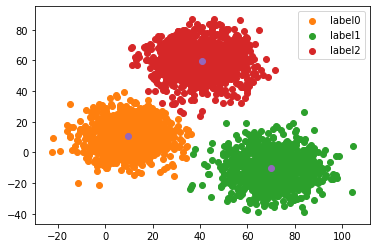

In [21]:
centers=KM.cluster_centers_
fig3=plt.figure()
plt.scatter(centers[:,0],centers[:,1])
label0=plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1=plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2=plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])
plt.scatter(centers[:,0],centers[:,1])
plt.legend((label0,label1,label2),('label0','label1','label2'))

In [24]:
y_predict_test=KM.predict([[80,60]])
y_predict_test

array([1], dtype=int32)

In [26]:
y_predict=KM.predict(X)
print(pd.value_counts(y_predict),pd.value_counts(y))

1    1149
0     952
2     899
dtype: int64 2    1156
1     954
0     890
Name: labels, dtype: int64


In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_predict)

0.0023333333333333335

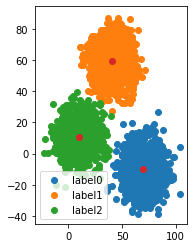

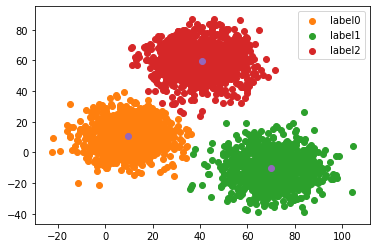

In [30]:
plt.scatter(centers[:,0],centers[:,1])
fig4=plt.subplot(121)
label0=plt.scatter(X.loc[:,'V1'][y_predict==0],X.loc[:,'V2'][y_predict==0])
label1=plt.scatter(X.loc[:,'V1'][y_predict==1],X.loc[:,'V2'][y_predict==1])
label2=plt.scatter(X.loc[:,'V1'][y_predict==2],X.loc[:,'V2'][y_predict==2])
plt.scatter(centers[:,0],centers[:,1])
plt.legend((label0,label1,label2),('label0','label1','label2'))

fig5=plt.figure(122)
plt.scatter(centers[:,0],centers[:,1])
label0=plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1=plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2=plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])
plt.scatter(centers[:,0],centers[:,1])
plt.legend((label0,label1,label2),('label0','label1','label2'))

In [32]:
y_corrected=[]
for i in y_predict:
    if i==0:
        y_corrected.append(1)
    elif i==1:
        y_corrected.append(2)
    else:
        y_corrected.append(0)
accuracy_score(y,y_corrected)

0.997

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [35]:
y_predict_knn_test=knn.predict([[80,60]])
y_predict_knn_test

array([2])

In [37]:
accuracy_score(y,knn.predict(X))

1.0

In [39]:
from sklearn.cluster import MeanShift,estimate_bandwidth
bw=estimate_bandwidth(X,n_samples=500)
bw

30.84663454820215

In [40]:
ms=MeanShift(bandwidth=bw)
ms.fit(X)

MeanShift(bandwidth=30.84663454820215, bin_seeding=False, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [42]:
y_pridict_ms=ms.predict(X)
pd.value_counts(y_pridict_ms)

0    1149
1     952
2     899
dtype: int64